<a href="https://colab.research.google.com/github/nctkrlms/Turkish_Text_Classifier/blob/main/Turkish_Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import re 
import nltk 
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q /content/drive/MyDrive/archive.zip -d ../


TTC_4900 VERİSETİ BURDA UNZIP EDİLİP PROJEDE KULLANILMAK ÜZERE YÜKLENMİŞTİR. VERİ SETİNİN İLK 5 VERİSİ GÖSTERİLMİŞTİR.


In [ ]:


df=pd.read_csv("/content/drive/MyDrive/7allV03.csv")
df_copy=df.copy()
df_copy.head()


,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...


VERİNİN KATEGORİ DAĞILIMLARI ÇIKARILMIŞTIR.

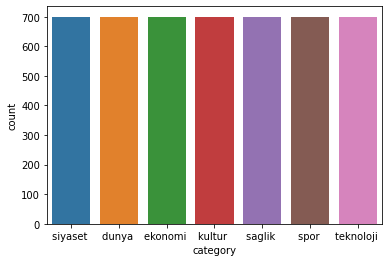

In [ ]:
import seaborn as sns 

sns.countplot("category",data=df_copy)

ETİKETLEME İŞLEMLERİ İÇİN LABEL ENCODER KULLANILMIŞTIR.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

labels=le.fit_transform(df_copy.category)
labels

In [ ]:
"""

0==Dunya
1==ekonomi
2==kultur
3==saglik
4==Siyaset
5==spor
6==teknoloji

"""

'\n\n0==Dunya\n1==ekonomi\n2==kultur\n3==saglik\n4==Siyaset\n5==spor\n6==teknoloji\n\n'

In [ ]:
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

ÖNCE VERİLERDE BULUNAN HABERLERİN TAMAMI KÜÇÜK HARFLERE ÇEVRİLMİŞTİR. SONRASINDA REGULAR EXPRESSION İŞLEMİ SAYESİNDE GEREKSİZ GÖRÜLEN TÜM KARAKTERLER VERİ SETİNDEN ÇIKARILMIŞTIR. NLTK KÜTÜPHANESİNİN TOKENİZE YÖNTEMİYLE HABER VERİLERİ KELİME KELİME AYRILMIŞTIR. ÖNCE TÜRKÇEDEKİ DAHA SONRA İNGİLİZCEDEKİ STOPWORDSLAR VERİLERDEN KALDIRILMIŞTIR. SONRASINDA LEMATIZE YÖNTEMİYLE KÖKLERİNE KADAR AYRILAN KELİMELERİN HEPSİ TEKRAR BİR LİSTE YARDIMIYLA BİRLEŞTİRİLMİŞ VE VERİ AYIKLAMA İŞLEMİ TAMAMLANMIŞTIR.

In [ ]:
text_list=[]

for text in df_copy.text:
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text=nltk.word_tokenize(text)
    text =[word for word in text if not word in set(stopwords.words("turkish"))]
    text =[word for word in text if not word in set(stopwords.words("english"))]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text] 
    text=" ".join(text)
    text_list.append(text)

In [ ]:


len(text_list)



4900

BAG OF WORDS DEDİĞİMİZ YÖNTEMLE VERİLER VEKTÖRİZE EDİLİP MAKİNENİN ANLAYACAĞI BİR DİL HALİNE DÖNÜŞTÜRÜLMÜŞTÜR.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #Bag of Words

max_features=5000 # BoW size

count_vectorizer=CountVectorizer(max_features=max_features) 

sparce_matrix=count_vectorizer.fit_transform(text_list).toarray()

In [ ]:
sparce_matrix.shape

(4900, 5000)

In [ ]:
sparce_matrix[0:1,0:30]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 2]])

In [ ]:
print("en çok kullanılan {} kelime: {}".format(max_features,count_vectorizer.get_feature_names()))

en çok kullanılan 5000 kelime: ['aa', 'ab', 'abd', 'abdullah', 'abone', 'acar', 'acarer', 'acil', 'acı', 'adalet', 'adam', 'adamları', 'adamlarının', 'adamı', 'adana', 'aday', 'adayı', 'adet', 'adeta', 'adil', 'adlandırılan', 'adli', 'adlı', 'adnan', 'adı', 'adım', 'adımlar', 'adımları', 'adına', 'adını', 'adının', 'adıyla', 'ael', 'afet', 'afganistan', 'afife', 'afrika', 'ahmed', 'ahmet', 'aile', 'ailelerin', 'ailenin', 'ailesi', 'ailesine', 'ailesinin', 'ait', 'ajansı', 'ak', 'akademik', 'akciğer', 'akdağ', 'akdeniz', 'akgül', 'akhisar', 'akif', 'akp', 'aksi', 'aksine', 'aksoy', 'aksu', 'aktaran', 'aktardı', 'aktif', 'aktör', 'akıl', 'akıllı', 'akın', 'akşam', 'akşamı', 'al', 'alacak', 'alacağı', 'alacağını', 'alakalı', 'alan', 'alana', 'alanda', 'alanlarda', 'alanları', 'alanlarında', 'alanya', 'alanı', 'alanına', 'alanında', 'alanındaki', 'alarak', 'albüm', 'albümü', 'aldı', 'aldık', 'aldıkları', 'aldıklarını', 'aldım', 'aldığı', 'aldığımız', 'aldığını', 'ale', 'alerjik', 'alevi', 

In [ ]:
data=pd.DataFrame(count_vectorizer.get_feature_names(),columns=["Words"])

In [ ]:


data.head()



,Words
0,aa
1,ab
2,abd
3,abdullah
4,abone


VEKTÖRLER X, LABELLAR Y ŞEKLİNDE AYRILIP MAKİNE ÖĞRENMESİ AŞAMSINA GEÇİŞ YAPILMIŞTIR.

In [ ]:
X=sparce_matrix
y=labels

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (3920, 5000)
x_test (980, 5000)
y_train (3920,)
y_test (980,)


**Makine öğrenmesi algoritmalarında Score kıyaslaması**

NAIVE BAYES

Accuracy: 0.8244897959183674
Precision: 0.8270074159921085
F1-Score: 0.8247877582484157


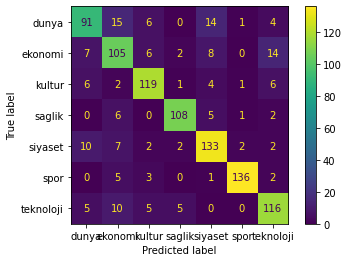

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score


print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="macro"))
print("F1-Score:",f1_score(y_test, y_pred, average="macro"))



cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'dunya', 'ekonomi','kultur','saglik','siyaset','spor','teknoloji'])
cmd.plot()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Tuned KFold Accuracy:",np.mean(cross_val_score(gnb, X, y,cv=k_fold, n_jobs=1)))



Tuned KFold Accuracy: 0.7979594166920885


Support Vector Machine


Accuracy: 0.8724489795918368
Precision: 0.8756771245767904
F1-Score: 0.8740255890416802


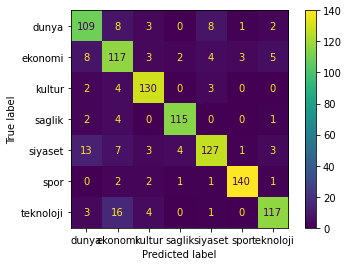

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
y_pred=svm.fit(X_train,y_train).predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="macro"))
print("F1-Score:",f1_score(y_test, y_pred, average="macro"))



cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'dunya', 'ekonomi','kultur','saglik','siyaset','spor','teknoloji'])
cmd.plot()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Tuned KFold Accuracy:",np.mean(cross_val_score(svm, X, y,cv=k_fold, n_jobs=1)))

Tuned KFold Accuracy: 0.8451030272958061


LOGISTIC REGRESSION

Accuracy: 0.8918367346938776
Precision: 0.8912726427759653
F1-Score: 0.891949566576519


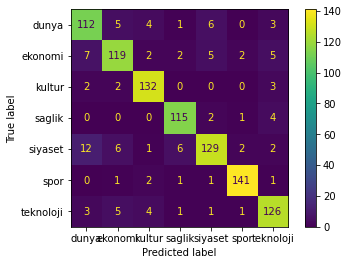

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="macro"))
print("F1-Score:",f1_score(y_test, y_pred, average="macro"))



cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'dunya', 'ekonomi','kultur','saglik','siyaset','spor','teknoloji'])
cmd.plot()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Tuned KFold Accuracy:",np.mean(cross_val_score(lr, X, y,cv=k_fold, n_jobs=1)))

Tuned KFold Accuracy: 0.8885722937486555


K-Nearest Neighbors

Accuracy: 0.4846938775510204
Precision: 0.7040438588635024
F1-Score: 0.5080692425520011


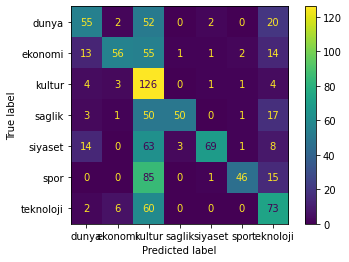

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="macro"))
print("F1-Score:",f1_score(y_test, y_pred, average="macro"))



cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'dunya', 'ekonomi','kultur','saglik','siyaset','spor','teknoloji'])
cmd.plot()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Tuned KFold Accuracy:",np.mean(cross_val_score(knn, X, y,cv=k_fold, n_jobs=1)))

Tuned KFold Accuracy: 0.48551361742198534


DECISION TREE

Accuracy: 0.7142857142857143
Precision: 0.7172824557836356
F1-Score: 0.7147283413917747


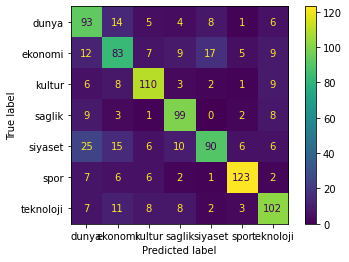

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
y_pred = dt.fit(X_train,y_train).predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="macro"))
print("F1-Score:",f1_score(y_test, y_pred, average="macro"))



cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'dunya', 'ekonomi','kultur','saglik','siyaset','spor','teknoloji'])
cmd.plot()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Tuned KFold Accuracy:",np.mean(cross_val_score(dt, X, y,cv=k_fold, n_jobs=1)))

Tuned KFold Accuracy: 0.7073472891702476


RANDOM FOREST

Accuracy: 0.8612244897959184
Precision: 0.860585351278201
F1-Score: 0.860648517425686


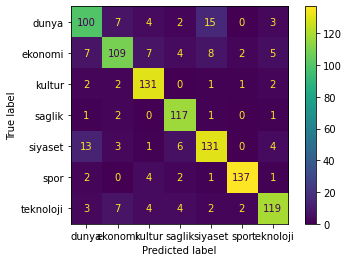

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=42)
y_pred = rf_model.fit(X_train,y_train).predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="macro"))
print("F1-Score:",f1_score(y_test, y_pred, average="macro"))



cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'dunya', 'ekonomi','kultur','saglik','siyaset','spor','teknoloji'])
cmd.plot()



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Tuned KFold Accuracy:",np.mean(cross_val_score(rf_model, X, y,cv=k_fold, n_jobs=1)))

Tuned KFold Accuracy: 0.8544905749755839
